In [37]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [40]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [41]:
# reflect an existing database into a new model

# reflect the tables

# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)

# View all the classes that automap found
Base.classes.keys()

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

# Create a session (link) from Python to the database
session = Session(engine)



C:\Users\Yasemin\AppData\Local\Temp\ipykernel_1860\3149344424.py:9: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [42]:
# View all of the classes that automap found

print(Base.classes.keys())


['measurement', 'station']


In [43]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [44]:
# Create our session (link) from Python to the DB

session = Session(engine)


# Exploratory Precipitation Analysis

In [45]:
# Find the most recent date in the data set.


In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number of stations in the dataset
# Query to calculate the total number of stations
total_stations = session.query(func.count(Station.station)).scalar()

print(f"Total number of stations: {total_stations}")


Total number of stations: 9


In [49]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)) \
                         .group_by(Measurement.station) \
                         .order_by(func.count(Measurement.station).desc()).all()

# Display the results
print("Most active stations (station ID and observation count):")
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")


Most active stations (station ID and observation count):
Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [50]:
# Get the most active station ID from the previous query
most_active_station = active_stations[0][0]
print(f"Most Active Station ID: {most_active_station}")

# Query to calculate the lowest, highest, and average temperature for the most active station
temperature_stats = session.query(
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == most_active_station).all()

# Display the results
lowest_temp, highest_temp, avg_temp = temperature_stats[0]
print(f"Temperature stats for station {most_active_station}:")
print(f"Lowest Temperature: {lowest_temp}°F")
print(f"Highest Temperature: {highest_temp}°F")
print(f"Average Temperature: {avg_temp:.1f}°F")


Most Active Station ID: USC00519281
Temperature stats for station USC00519281:
Lowest Temperature: 54.0°F
Highest Temperature: 85.0°F
Average Temperature: 71.7°F


Latest Date in the dataset: 2017-08-23


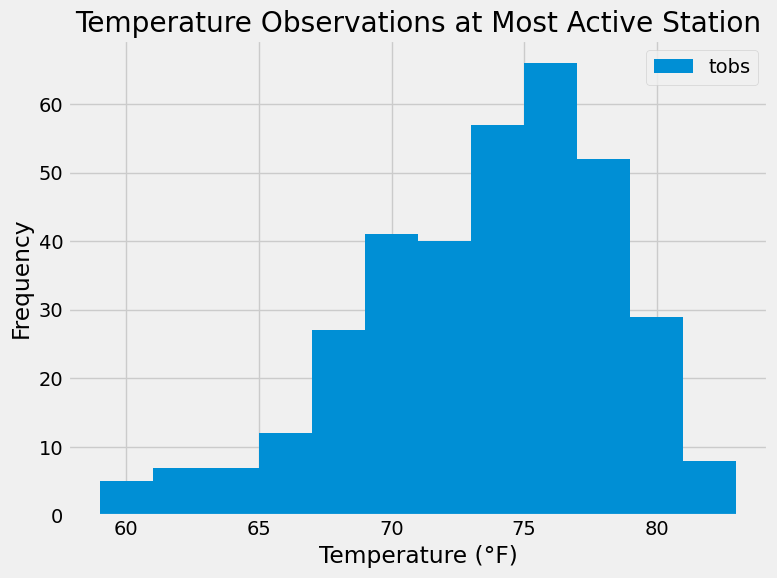

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
latest_date = session.query(func.max(Measurement.date)).scalar()
print(f"Latest Date in the dataset: {latest_date}")

one_year_ago = dt.datetime.strptime(latest_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Query the last 12 months of temperature observation data for the most active station
tobs_data = session.query(Measurement.tobs) \
                   .filter(Measurement.station == most_active_station) \
                   .filter(Measurement.date >= one_year_ago).all()

# Convert the query results to a Pandas DataFrame
tobs_df = pd.DataFrame(tobs_data, columns=["tobs"])

# Plot the results as a histogram
tobs_df.plot.hist(bins=12, figsize=(8, 6), title="Temperature Observations at Most Active Station")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



# Close Session

In [52]:
# Close Session
session.close()